In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_size = (299, 299)
batch_size = 50

In [ ]:
image_gen = ImageDataGenerator(preprocessing_function= keras.applications.inception_v3.preprocess_input, validation_split=0.2 )    


train_dataset = image_gen.flow_from_directory(batch_size=batch_size,
                                                 directory="/content/drive/MyDrive/standford_dt/car_train/car_train",
                                                 #shuffle=True,
                                                 target_size=image_size, 
                                                 subset="training",
                                                  seed = 42,
                                                 class_mode='categorical')

validation_dataset = image_gen.flow_from_directory(batch_size=batch_size,
                                                 directory="/content/drive/MyDrive/standford_dt/car_train/car_train",
                                                 #shuffle=True,
                                                 target_size=image_size, 
                                                 subset="validation",
                                                  seed = 42,
                                                 class_mode='categorical')

Found 10413 images belonging to 157 classes.
Found 2535 images belonging to 157 classes.


In [ ]:
from tensorflow.keras.applications import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
inputs = keras.Input(shape=(299, 299, 3))

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=True, input_tensor=inputs)#getting base Inception V3 model

96124928/96112376 [==============================] - 1s 0us/step


In [ ]:
last_layer = base_model.layers[-2].output
out = Dense(units = 157, activation = 'softmax', name = 'ouput')(last_layer)
new_model = Model(inputs = inputs, outputs = out)

In [ ]:
for layer in new_model.layers[:-45]:#setting first few layers to not be trainable
  layer.trainable = False

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
new_model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
#tf.config.run_functions_eagerly(True)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode = 'min')

In [ ]:

head_model_v3 = new_model.fit_generator(generator = train_dataset, validation_data = validation_dataset,epochs = 25 , verbose=1 ,
                                        callbacks=[callback] )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/25
209/209 [==============================] - 4622s 22s/step - loss: 2.6503 - accuracy: 0.3645 - val_loss: 1.7112 - val_accuracy: 0.5408
Epoch 2/25
209/209 [==============================] - 141s 674ms/step - loss: 0.7886 - accuracy: 0.7855 - val_loss: 1.1918 - val_accuracy: 0.6623


In [ ]:
new_model.save('/content/drive/MyDrive/standford_dt/inceptionv3')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/standford_dt/inceptionv3/assets


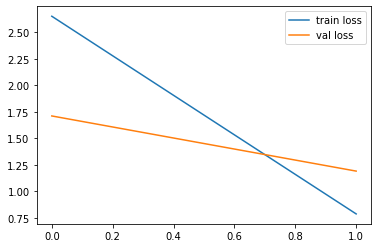

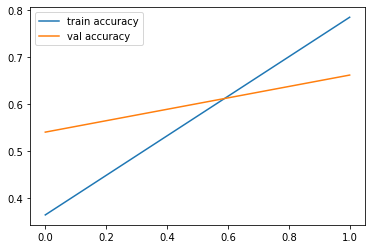

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(head_model_v3.history['loss'], label='train loss')
plt.plot(head_model_v3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies for r
plt.plot(head_model_v3.history['accuracy'], label='train accuracy')
plt.plot(head_model_v3.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
transform_test = ImageDataGenerator(preprocessing_function= keras.applications.resnet.preprocess_input)
test_ds = transform_test.flow_from_directory(
    "/content/drive/MyDrive/standford_dt/car_test/cars_test",
    seed = 42,target_size=image_size,batch_size=batch_size
)

In [ ]:
new_model.save('/content/drive/MyDrive/standford_dt/inceptionv3')

###############################################################################